In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
T = 50 # days
N0 = 15 * 10**5
I0 = 2000
R0 = 1500
S0 = N0 - I0 - R0
a = 0.11 # infection dependency
gamma = 0.5 # recovery dependency
mu = 0.0011 # death dependency
delta = 0.0001

In [113]:
def s(S, I, R):
    return delta*N0 - mu*S - (gamma*I/N0)*S

def i(S, I, R):
    return (gamma*I/N0)*S - (mu + a)*I

def r(S, I, R):
    return a*I - mu*R

In [114]:
dt = 1
t = np.linspace(0, T, int(T/dt) + 1)

In [115]:
# Estimate by Runge-Kutta Method
S_rk = np.zeros(len(t))
S_rk[0] = S0

I_rk = np.zeros(len(t))
I_rk[0] = I0

R_rk = np.zeros(len(t))
R_rk[0] = R0

N_rk = np.zeros(len(t))
N_rk[0] = N0

for it in range(1, len(t)):    
    xk1 = s(S_rk[it-1], I_rk[it-1], R_rk[it-1])
    yk1 = i(S_rk[it-1], I_rk[it-1], R_rk[it-1])
    zk1 = r(S_rk[it-1], I_rk[it-1], R_rk[it-1])
    xk2 = s(S_rk[it-1] + xk1 * dt/2, I_rk[it-1] + yk1 * dt/2, R_rk[it-1] + zk1 * dt/2)
    yk2 = i(S_rk[it-1] + xk1 * dt/2, I_rk[it-1] + yk1 * dt/2, R_rk[it-1] + zk1 * dt/2)
    zk2 = r(S_rk[it-1] + xk1 * dt/2, I_rk[it-1] + yk1 * dt/2, R_rk[it-1] + zk1 * dt/2)
    xk3 = s(S_rk[it-1] + xk2 * dt/2, I_rk[it-1] + yk2 * dt/2, R_rk[it-1] + zk2 * dt/2)
    yk3 = i(S_rk[it-1] + xk2 * dt/2, I_rk[it-1] + yk2 * dt/2, R_rk[it-1] + zk2 * dt/2)
    zk3 = r(S_rk[it-1] + xk2 * dt/2, I_rk[it-1] + yk2 * dt/2, R_rk[it-1] + zk2 * dt/2)
    xk4 = s(S_rk[it-1] + xk3 * dt, I_rk[it-1] + yk3 * dt, R_rk[it-1] + zk3 * dt)
    yk4 = i(S_rk[it-1] + xk3 * dt, I_rk[it-1] + yk3 * dt, R_rk[it-1] + zk3 * dt)
    zk4 = r(S_rk[it-1] + xk3 * dt, I_rk[it-1] + yk3 * dt, R_rk[it-1] + zk3 * dt)

    S_rk[it] = S_rk[it-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    I_rk[it] = I_rk[it-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)
    R_rk[it] = R_rk[it-1] + (1/6) * dt * (zk1 + 2*zk2 + 2*zk3 + zk4)
    N_rk[it] = S_rk[it] + I_rk[it] + R_rk[it]

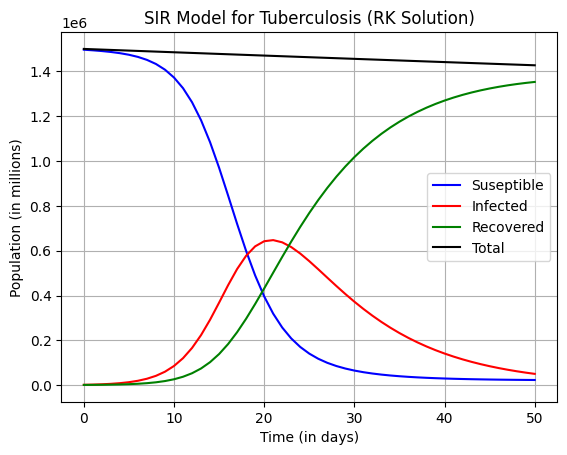

In [116]:
plt.plot(t, S_rk, label='Suseptible', color='blue')
plt.plot(t, I_rk, label='Infected', color='red')
plt.plot(t, R_rk, label='Recovered', color='green')
plt.plot(t, N_rk, label='Total', color='black')
plt.xlabel('Time (in days)')
plt.ylabel('Population (in millions)')
plt.title('SIR Model for Tuberculosis (RK Solution)')
plt.legend()
plt.grid()

plt.show()